In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/Data_Classification.csv'
data = pd.read_csv(path)

In [ ]:
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']

In [ ]:
y.shape

(700,)

In [ ]:
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3)

In [ ]:
from keras.utils import np_utils
y_u_test = np_utils.to_categorical(y_test)
y_u_train = np_utils.to_categorical(y_train)

In [ ]:
model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(2, activation=ks.activations.sigmoid))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 20)                83740     
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_49 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_50 (Dense)             (None, 209)               4389      
_________________________________________________________________
dense_51 (Dense)             (None, 211)               44310     
_________________________________________________________________
dense_52 (Dense)             (None, 20)                4240      
_________________________________________________________________
dense_53 (Dense)             (None, 20)               

In [ ]:
model.compile( loss=ks.losses.binary_crossentropy  , 
              optimizer = ks.optimizers.Adam() ,  
              metrics = 'acc')

In [ ]:
history = model.fit(x_train, y_u_train, epochs=100, batch_size=30,  verbose=1, validation_data = (x_test,y_u_test))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 0.5636 - acc: 0.8265 - val_loss: 0.4837 - val_acc: 0.8143
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3838 - acc: 0.8755 - val_loss: 0.5135 - val_acc: 0.8143
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3643 - acc: 0.8755 - val_loss: 0.4616 - val_acc: 0.8143
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3216 - acc: 0.8755 - val_loss: 0.3453 - val_acc: 0.8143
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1876 - acc: 0.9000 - val_loss: 0.1113 - val_acc: 0.9905
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0500 - acc: 0.9980 - val_loss: 0.0316 - val_acc: 0.9952
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0247 - acc: 0.9980 - val_loss: 0.0361 - val_acc: 0.9905
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0110 - 

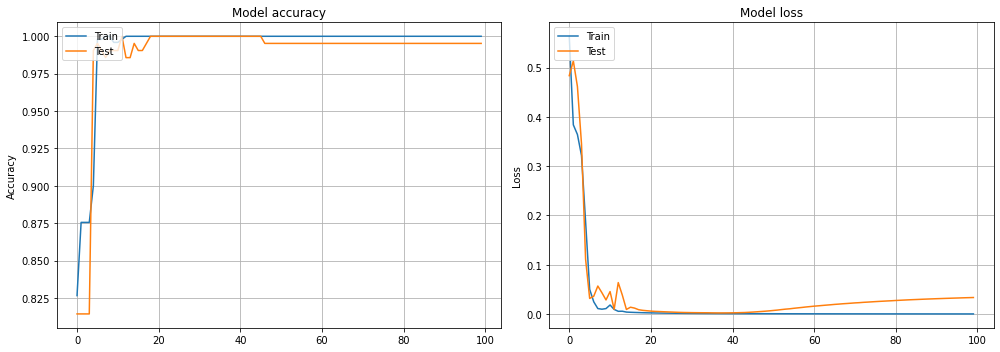

In [ ]:
fig = plt.figure(figsize=(14,5))
# Plot training & validation accuracy values
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_u_pred = model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))

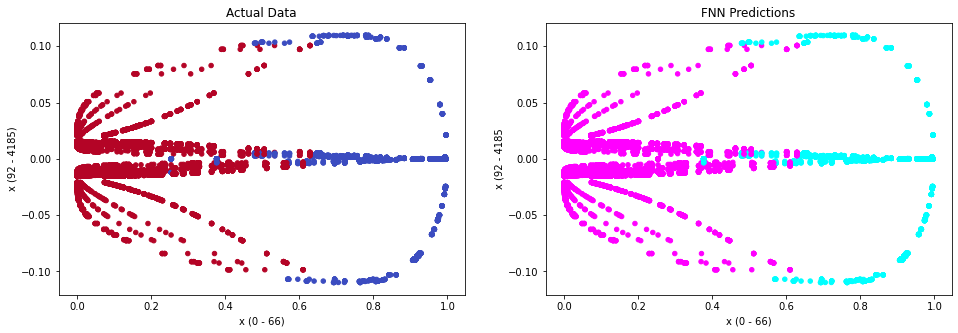

In [ ]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1, title = 'Actual Data',xlabel = 'x (0 - 66)', ylabel='x (92 - 4185)')
for i in np.arange(0,66,5):
  for j in np.arange(92,4185,1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = test , cmap=plt.cm.coolwarm, s=20)

ax = fig.add_subplot(1,2,2, title = 'FNN Predictions', xlabel = 'x (0 - 66)', ylabel='x (92 - 4185')
for i in np.arange(0,66, 5):
  for j in np.arange(92,4185, 1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = pred  , cmap=plt.cm.cool, s=20)

plt.show()

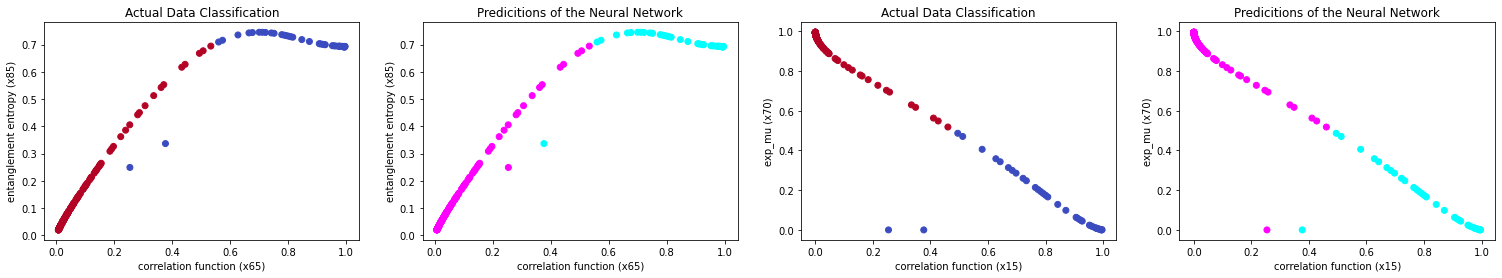

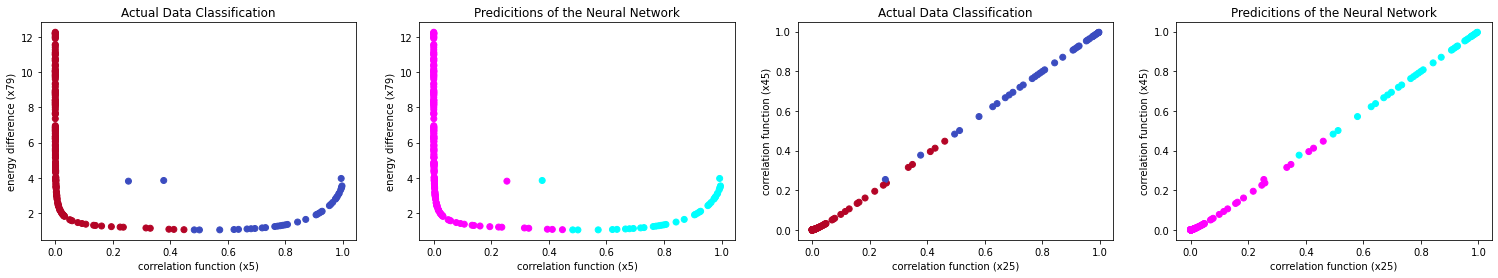

In [ ]:
fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(141 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,64], x_test[:,84], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,64], x_test[:,84],  c = pred ,cmap=plt.cm.cool)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,14], x_test[:,69], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,14], x_test[:,69],  c = pred ,cmap=plt.cm.cool)

plt.show()

fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(141 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Actual Data Classification')

ax.scatter(x_test[:,4].T, x_test[:,78] , c= test,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,4].T, x_test[:,78] , c = pred,cmap=plt.cm.cool)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,24], x_test[:,44], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,24], x_test[:,44],  c = pred ,cmap=plt.cm.cool)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
clf_report_rf = classification_report(test,pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      1.00       171

    accuracy                           1.00       210
   macro avg       1.00      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210



In [ ]:
def plot_decision_boundary(X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

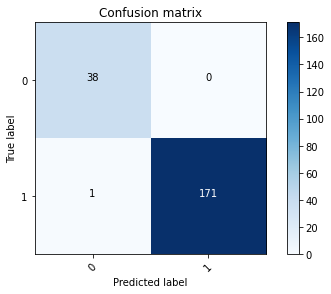

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
cm = confusion_matrix(pred, test)
plot_confusion_matrix(cm,[0,1])